In [1]:
import scipy.io
import pandas as pd
import torch.nn as nn
import torch

mat = scipy.io.loadmat('alcoholism/uci_eeg_images_v2.mat')
data = mat['data']

In [2]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'data', 'y_alcoholic', 'y_stimulus', 'subjectid'])

In [3]:
df = pd.DataFrame(mat['subjectid'])

In [4]:
mat

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Thu Apr  1 11:49:18 2021',
 '__version__': '1.0',
 '__globals__': [],
 'data': array([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
         

In [5]:
df = pd.DataFrame()
outer = []
for d in data:
    d = d.reshape(3,32,32)
    lst = [] 
    for colour in d:
        lst.append(sum(sum(colour)))
    outer.append(lst)

        
    

In [6]:
df = pd.DataFrame(outer)

In [7]:
df.columns = ['Theta', 'Alpha','Beta']

In [8]:
df['y_stimulus'] = pd.DataFrame.from_dict(mat['y_stimulus']).T
df['y_stimulus_1'] = (df['y_stimulus'] == 1).astype(int)
df['y_stimulus_2'] = (df['y_stimulus'] == 2).astype(int)
df['y_stimulus_3'] = (df['y_stimulus'] == 3).astype(int)
df['y_stimulus_4'] = (df['y_stimulus'] == 4).astype(int)
df['y_stimulus_5'] = (df['y_stimulus'] == 5).astype(int)
df['y_alcoholic'] = pd.DataFrame.from_dict(mat['y_alcoholic']).T

In [9]:
df = df.drop(columns=['y_stimulus'])

In [10]:
import matplotlib.pyplot as plt

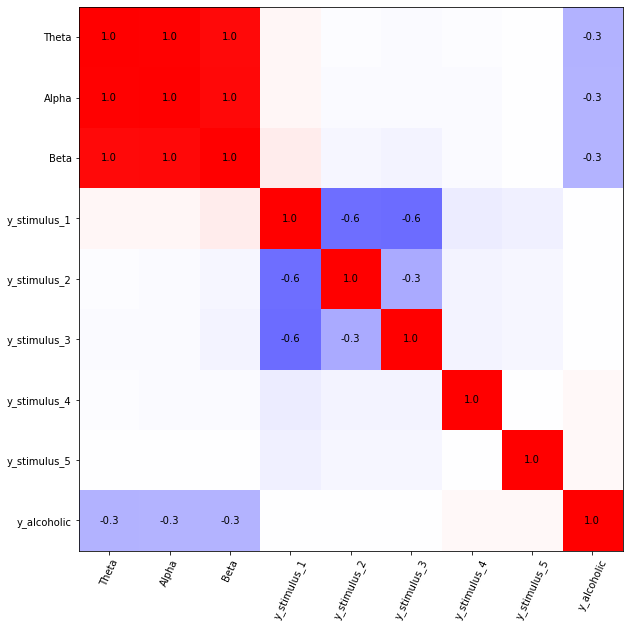

In [11]:
# This code is copied from my COMP2420 Assignment
plt.figure(figsize=(10,10))
plt.imshow(df.corr() , cmap = 'bwr',vmin=-1, vmax=1,);
plt.yticks(range(9),df.corr().head());
plt.xticks(range(9),df.corr().head(),rotation='65');
df_cor = df.corr().values.round(1).tolist()
for col in range(9):
    for row in range(9):
        if abs(df_cor[row][col])>= 0.2:
            plt.text(col, row, df_cor[row][col], ha = 'center',va='center',color='black');